In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
%load_ext autoreload

%autoreload 2

In [2]:
from keras.models import Sequential
from keras.layers import Dense
import keras.layers as ly

Using TensorFlow backend.


In [3]:
model = Sequential()
model.add(ly.Dense(units=12, activation='relu', input_dim=2))
model.add(ly.Dense(units=6, activation='relu'))
model.add(ly.Dense(units=1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['accuracy'])

In [4]:
from olac import data_generators

In [5]:
X_train, y_train = np.split(np.vstack(list(data_generators.roving_balls(steps=5000))),[2],1)
X_test, y_test = np.split(np.vstack(list(data_generators.roving_balls(steps=1000))),[2],1)

In [6]:
model_hist = model.fit(X_train[:200], y_train[:200].astype(int), epochs=100, batch_size=20, verbose=0)

In [15]:
%timeit (model.predict(X_train[:500]))

2.28 ms ± 56.7 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [37]:
from olac import vis
from olac import popping_clusters as pop

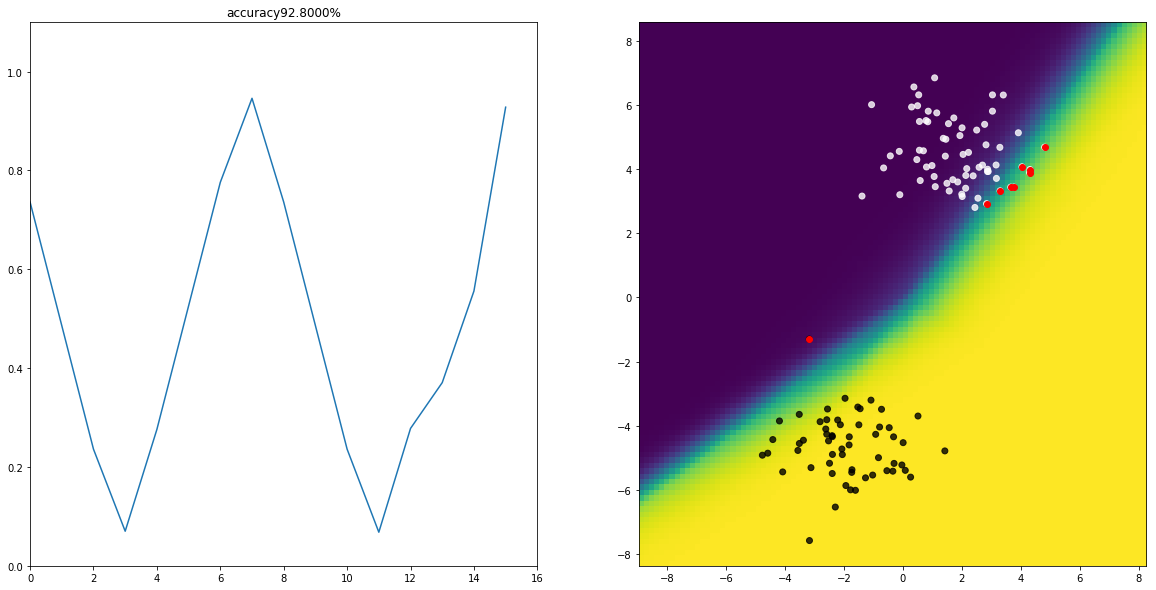

In [36]:
vis.main(model, data_generators.roving_balls, 'accuracy', steps=2000, p_train=10, window=500)

KeyboardInterrupt: 

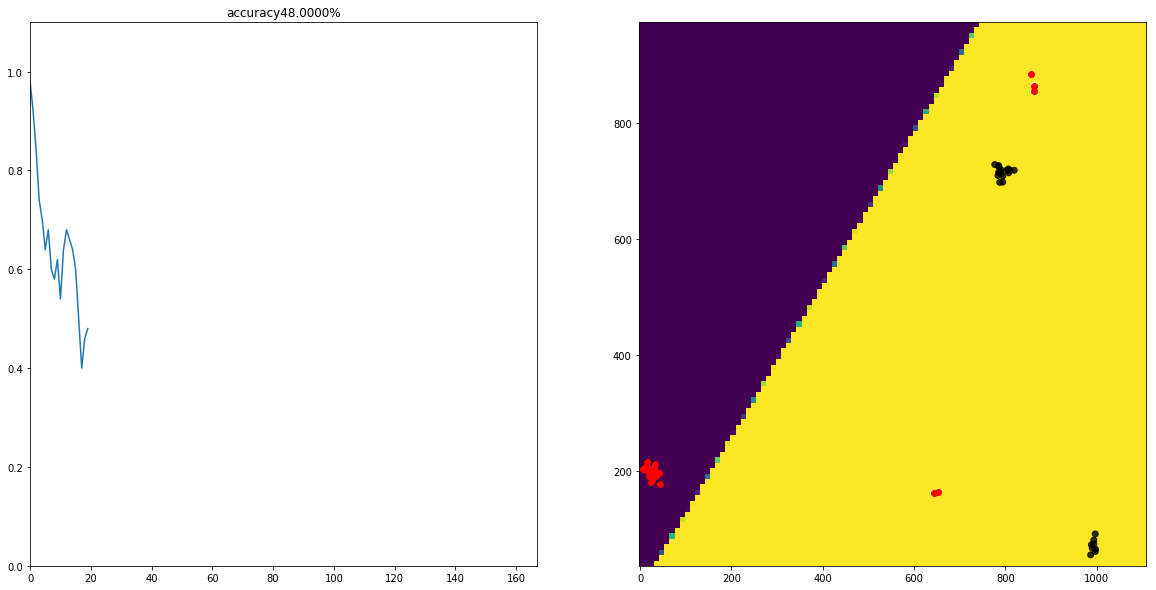

In [39]:
vis.main(model, pop.cluster_generator, 'accuracy', n_points=2000, p_train=50, window=50)